In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2664 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1097 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0737 - accuracy: 0.9768


In [8]:
loss, accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9720


1/1 [==============================] - 0s 104ms/step
this digit is probably a 0


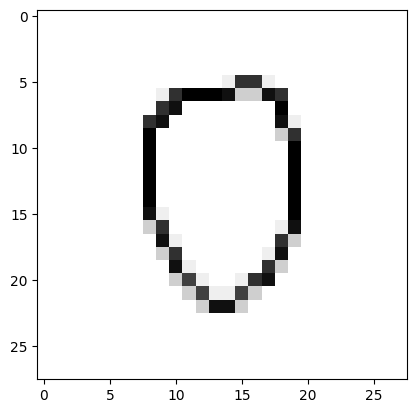

1/1 [==============================] - 0s 31ms/step
this digit is probably a 1


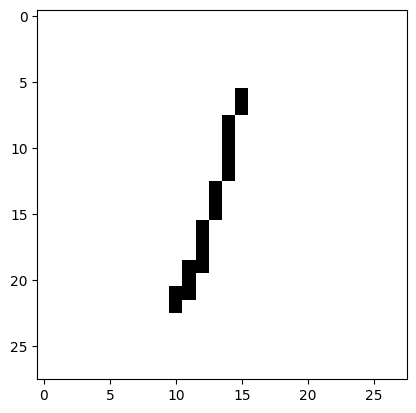

1/1 [==============================] - 0s 25ms/step
this digit is probably a 2


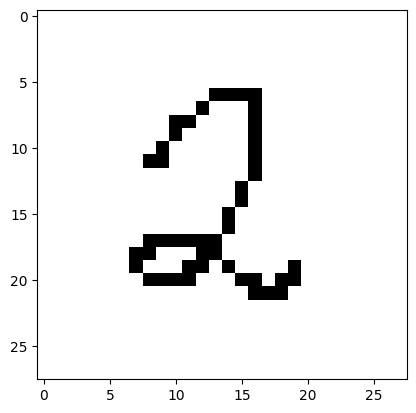

1/1 [==============================] - 0s 26ms/step
this digit is probably a 7


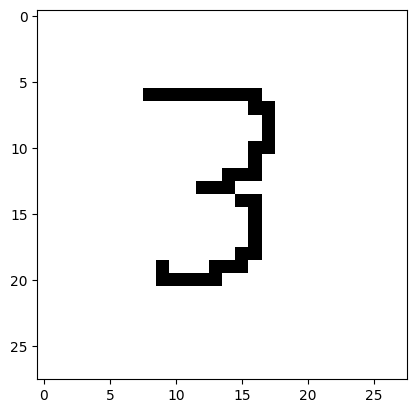

In [9]:
image_number = 0
while os.path.isfile(f"/content/digit{image_number}.png"):
  try:
    img = cv2.imread(f"/content/digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"this digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_number += 1

1/1 [==============================] - 0s 24ms/step
this digit is probably a 0


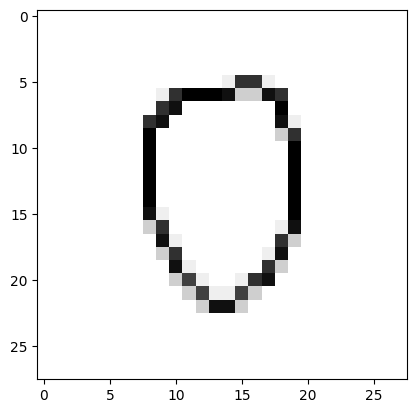

In [17]:
try:
    img = cv2.imread(f"/content/digit0.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"this digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
except:
    print("Error!")